# Wrangle_act We RateDogs

## Table of Contents

- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one & visualization](#one)
   - [Insight two](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)

<a id=intro></a>
## Introduction

<a id=gather> </a>
## Gathering Data

### Gather each of the three pieces of data

 - **twitter-archive-enhanced.csv** the WeRateDogs Twitter archive.
    
    
 - **image_predictions.tsv** the tweet image predictions, i.e., what breed of dog (or other object,      animal, etc.) is present in each tweet according to a neural network.
 
 
 - **tweet_json.txt** 
    - Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    - Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.



### 1. WeRateDogs Twitter archive: twitter-archive-enhanced.csv

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [3]:
# import csv file as a dataframe
tweet_archive_df = pd.read_csv("twitter-archive-enhanced.csv")


## 2. The tweet image predictions image_predictions.tsv

In [4]:
# URL downloaded programatically 
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(file_url)

with open(os.path.join(os.getcwd(), file_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:

# Read Tsv files
image_prediction_df = pd.read_csv('image-predictions.tsv', sep='\t' )

### 3. tweet_json.txt 

In [6]:
CONSUMER_KEY = "############"
CONSUMER_SECRET = "###############"
OAUTH_TOKEN = "#############"
OAUTH_TOKEN_SECRET = "############"
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)



In [7]:
#Download Tweepy status object based on Tweet ID and store in list
tweets_list = []
# Tweets that can't be found are saved in the list below:
cant_find_tweetsid_list = []
for tweet_id in tweet_archive_df['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except:
        cant_find_tweetsid_list.append(tweet_id)
        print(f"We cann't find those id: {tweet_id}")

We cann't find those id: 888202515573088257
We cann't find those id: 873697596434513921
We cann't find those id: 872668790621863937
We cann't find those id: 872261713294495745
We cann't find those id: 869988702071779329
We cann't find those id: 866816280283807744
We cann't find those id: 861769973181624320
We cann't find those id: 856602993587888130
We cann't find those id: 845459076796616705
We cann't find those id: 844704788403113984
We cann't find those id: 842892208864923648
We cann't find those id: 837012587749474308
We cann't find those id: 827228250799742977
We cann't find those id: 812747805718642688
We cann't find those id: 802247111496568832
We cann't find those id: 775096608509886464
We cann't find those id: 770743923962707968
Rate limit reached. Sleeping for: 709
We cann't find those id: 754011816964026368
We cann't find those id: 680055455951884288
Rate limit reached. Sleeping for: 710


In [18]:
print(f"We get data for {len(tweets_list)} tweet ids")
print(f"There are {len(cant_find_tweetsid_list)} tweet ids we cann't get data")

We get data for 2337 tweet ids
There are 19 tweet ids we cann't get data


In [40]:
# Create a dataframe from tweets_list
RateDogs_df = pd.DataFrame(tweets_list)
RateDogs_df = df[['created_at', 'id', 'text', 'in_reply_to_user_id_str','user', 'retweet_count', 'favorite_count']]
RateDogs_df.head()

,created_at,id,text,in_reply_to_user_id_str,user,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8188,37547
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6058,32274
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4008,24314
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8343,40885
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9037,39085


In [41]:
# Save dataframe as csv.file
RateDogs_df.to_csv("RateDogs.csv",index=False)

<a id=assess></a>
## Assessing Data


### Visial  Assessment

In [7]:
# WeRateDogs Twitter archive dataframe
tweet_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# tweet image predictions dataframe
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# DogRate data dataframe
Rate_dogs_df = pd.read_csv("RateDogs.csv")
Rate_dogs_df.head()

,created_at,id,text,in_reply_to_user_id_str,user,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8188,37547
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6058,32274
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4008,24314
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8343,40885
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9037,39085


In [8]:
# Resave dataframe as tweet_json.txt
df = pd.read_csv("RateDogs.csv")
df.to_csv('tweet_json.txt', encoding = 'utf-8')

### Programmatically Assessment

In [9]:
# WeRateDogs Twitter archive dataframe
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Check duplicated columns
tweet_archive_df.duplicated().sum()

0

In [11]:
# Check values in the "rating_numerator" column
tweet_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
tweet_archive_df[tweet_archive_df['rating_numerator']== 420]
# 2074 (tweet_id = 670842764863651840) is not about dog, will be deleted manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [13]:
tweet_archive_df[tweet_archive_df['rating_numerator']== 75]
# 340 and # 695 are the same dog
# 695(tweet_id = 786709082849828864)will be deleted manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [14]:
tweet_archive_df[tweet_archive_df['rating_numerator']== 960]
# 313 (tweet_id = 835246439529840640) didn't get a valid rating 960/00, manually change rating_numerator to 13, change rating_denominator to 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
tweet_archive_df[tweet_archive_df['tweet_id']== 775096608509886464] #784 tweet_id = 775096608509886464 it will be deleted when delete all retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [16]:
tweet_archive_df[tweet_archive_df['tweet_id']== 740373189193256964] #actual rating 14/10 need to change manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [17]:
tweet_archive_df[tweet_archive_df['tweet_id']== 682962037429899265] #actual rating 10/10 need to change manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [18]:
tweet_archive_df[tweet_archive_df['tweet_id']== 666287406224695296] #actual rating 9/10 need to change manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
tweet_archive_df[tweet_archive_df['tweet_id']== 682808988178739200] #actual rating 20/16 need to change manually

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [20]:
tweet_archive_df[tweet_archive_df['tweet_id']== 832088576586297345]  #no rating - delete

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [21]:
tweet_archive_df[tweet_archive_df['tweet_id']== 810984652412424192]  #no rating - delete

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [22]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
# tweet image predictions dataframe
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Check duplicated rows
image_prediction_df.duplicated().sum()

0

In [25]:
# Check duplicated image url
image_prediction_df['jpg_url'].duplicated().sum()

66

In [26]:
# DogRate data dataframe
Rate_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
created_at                 2337 non-null object
id                         2337 non-null int64
text                       2337 non-null object
in_reply_to_user_id_str    77 non-null float64
user                       2337 non-null object
retweet_count              2337 non-null int64
favorite_count             2337 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 127.9+ KB


In [30]:
Rate_dogs_df.duplicated().sum()

0


<a id=quality></a>
### Quality

### WeRateDogs Twitter archive dataframe
1. Delete the columns we don't need : "in_reply_to_status_id", 'in_reply_to_user_id ', "retweeted_status_id","source" 'retweeted_status_user_id','retweeted_status_timestamp'
2. Erroneous datatypes (doggo, floofer, pupper and puppo columns)
3. convert timestamp to datetime
4. Correct numerators and denominators
5. Delete some deleted twitter 


### tweet image predictions dataframe
1. Drop 66 jpg_url duplicated
2. Create 1 column for image prediction and 1 column for confidence level
3. Delete columns that won't be used for analysis
4. Extract dog_type and confidence from p1,p2,p3

###  DogRate data dataframe
1. Simplify column 'user'
2. Delete columns that won't be used for analysis


## Tidiness
Convert three dataframe to one dataset

<a id=clean></a>
## Cleaning Data

In [27]:
# WeRateDogs Twitter archive dataframe
tweet_archive_clean_df = tweet_archive_df.copy()
tweet_archive_clean_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [33]:
# Delete unused column and add 
tweet_archive_clean_df =tweet_archive_clean_df[['tweet_id','timestamp','text','expanded_urls','rating_numerator',
                                                'rating_denominator','name','doggo','floofer','pupper','puppo']]

In [34]:
tweet_archive_clean_df.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [35]:
# Fix Erroneous datatypes (doggo, floofer, pupper and puppo columns)

# Add one column 'dogs_stage' in tweet_archive_clean_df
# Conbine data of four columns 'doggo','floofer','pupper','puppo' in one column'dogs_stage'
tweet_archive_clean_df['dogs_stage'] = tweet_archive_clean_df['doggo']+" "+ tweet_archive_clean_df['floofer']+" "+\
                                        tweet_archive_clean_df['pupper']+" "+ tweet_archive_clean_df['puppo']
# Convert "None" to ""
for i in range(len(tweet_archive_clean_df)):
    if tweet_archive_clean_df.loc[i,'dogs_stage']=="None None None None":
        tweet_archive_clean_df.loc[i,'dogs_stage']="None"
    else: 
        tweet_archive_clean_df.loc[i,'dogs_stage']=tweet_archive_clean_df.loc[i,'dogs_stage'].replace("None","").strip(" ")

In [36]:
tweet_archive_clean_df.dogs_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo  pupper      12
floofer             9
doggo floofer       1
doggo   puppo       1
Name: dogs_stage, dtype: int64

In [37]:
# Drop four columns 'doggo','floofer','pupper','puppo'
tweet_archive_clean_df = tweet_archive_clean_df.drop(columns=['doggo','floofer','pupper','puppo'])
tweet_archive_clean_df.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


In [38]:
# Correct numerators and denominators
# 313 manually change rating_numerator to 13, change rating_denominator to 10
tweet_archive_clean_df.loc[313,'rating_numerator']=13
tweet_archive_clean_df.loc[313,'rating_denominator']=10
# 1068 actual rating 14/10 need to change manually
tweet_archive_clean_df.loc[1068,'rating_numerator']=14
tweet_archive_clean_df.loc[1068,'rating_denominator']=10
# 1662 actual rating 10/10 need to change manually
tweet_archive_clean_df.loc[1662,'rating_numerator']=10
tweet_archive_clean_df.loc[1662,'rating_denominator']=10
# 2335 actual rating 9/10 need to change manually
tweet_archive_clean_df.loc[2335,'rating_numerator']=9
tweet_archive_clean_df.loc[2335,'rating_denominator']=10
# 1663 actual rating 20/16 need to change manually
tweet_archive_clean_df.loc[1663,'rating_numerator']=20
tweet_archive_clean_df.loc[1663,'rating_denominator']=16



In [39]:
#Delete twitter 
tweet_archive_clean_df = tweet_archive_clean_df[tweet_archive_clean_df["tweet_id"] != 670842764863651840]
tweet_archive_clean_df = tweet_archive_clean_df[tweet_archive_clean_df["tweet_id"] != 786709082849828864]
tweet_archive_clean_df = tweet_archive_clean_df[tweet_archive_clean_df["tweet_id"] != 832088576586297345]
tweet_archive_clean_df = tweet_archive_clean_df[tweet_archive_clean_df["tweet_id"] != 810984652412424192]
tweet_archive_clean_df = tweet_archive_clean_df[tweet_archive_clean_df["tweet_id"] != 775096608509886464]

In [40]:
#convert timestamp to datetime and change the column name to "date"
tweet_archive_clean_df['timestamp'] = pd.to_datetime(tweet_archive_clean_df['timestamp']).dt.date
tweet_archive_clean_df = tweet_archive_clean_df.rename(columns={'timestamp':'date'})


In [41]:
tweet_archive_clean_df.head(2)

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


In [17]:
# tweet image predictions dataframe
image_prediction_clean = image_prediction_df.copy()
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# Extract dog_type and confidence from p1,p2,p3
# Create two coloum "dog_type" and "confidence"
image_prediction_clean["dog_type"]=""
image_prediction_clean["confidence"]=""

for i in range(len(image_prediction_clean)):
    if image_prediction_clean.loc[i,"p1_dog"]==True:
        image_prediction_clean.loc[i,"dog_type"] = image_prediction_clean.loc[i,"p1"]
        image_prediction_clean.loc[i,"confidence"] = image_prediction_clean.loc[i,"p1_conf"]
    elif image_prediction_clean.loc[i,"p2_dog"]==True:
        image_prediction_clean.loc[i,"dog_type"]=image_prediction_clean.loc[i,"p2"]
        image_prediction_clean.loc[i,"confidence"]=image_prediction_clean.loc[i,"p2_conf"]
    elif image_prediction_clean.loc[i,"p3_dog"]==True:
        image_prediction_clean.loc[i,"dog_type"]=image_prediction_clean.loc[i,"p3"]
        image_prediction_clean.loc[i,"confidence"]=image_prediction_clean.loc[i,"p3_conf"]
    else:
        image_prediction_clean.loc[i,"dog_type"]="None"
        image_prediction_clean.loc[i,"confidence"]="None"

In [19]:
# Drop columns we don't needed
image_prediction_clean = image_prediction_clean [['tweet_id','jpg_url','img_num','dog_type','confidence']]
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_type,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [20]:
# Drop duplicated jpg url

image_prediction_clean = image_prediction_clean.drop_duplicates(subset='jpg_url',keep='first')

# Recheck the duplicated jpg url rows
image_prediction_clean['jpg_url'].duplicated().sum()

0

In [21]:
len(image_prediction_clean)

2009

In [22]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_type,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [23]:
image_prediction_clean.to_csv("dogtype.csv",index=False)

In [48]:
# DogRate data dataframe
Rate_dogs_clean = Rate_dogs_df.copy()
Rate_dogs_clean.head()

,created_at,id,text,in_reply_to_user_id_str,user,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8188,37547
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6058,32274
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4008,24314
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8343,40885
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9037,39085


In [49]:
# Delete columns that won't be used for analysis
Rate_dogs_clean = Rate_dogs_clean[['id','retweet_count','favorite_count']]

In [50]:
Rate_dogs_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8188,37547
1,892177421306343426,6058,32274
2,891815181378084864,4008,24314
3,891689557279858688,8343,40885
4,891327558926688256,9037,39085


### Tidiness

In [51]:
#Convert tweet_id from str to int in Rate_dogs_clean dataframe
Rate_dogs_clean['id'] = Rate_dogs_clean['id'].astype(int)
# Rename 'id' to 'tweet_id'
Rate_dogs_clean = Rate_dogs_clean.rename(columns={'id':'tweet_id'})
Rate_dogs_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8188,37547
1,892177421306343426,6058,32274
2,891815181378084864,4008,24314
3,891689557279858688,8343,40885
4,891327558926688256,9037,39085


In [52]:
# Conbine three dataframes in one dataframe
Rate_dogs_combine = tweet_archive_clean_df.merge(image_prediction_clean, how = 'left', on = ['tweet_id'])
Rate_dogs_combine = Rate_dogs_combine.merge(Rate_dogs_clean, how = 'left', on = ['tweet_id'])

In [53]:
Rate_dogs_combine.head()

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,dog_type,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,None,8188.0,37547.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6058.0,32274.0
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4008.0,24314.0
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8343.0,40885.0
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9037.0,39085.0


In [54]:
len(Rate_dogs_combine)

2351

In [55]:
# Drop rows with missing data in column 'jpg_url'
Rate_dogs_combine = Rate_dogs_combine.dropna(subset=['jpg_url'])
# Drop column"img_num "
Rate_dogs_combine = Rate_dogs_combine.drop(columns=['img_num'])

In [56]:
Rate_dogs_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2350
Data columns (total 13 columns):
tweet_id              2006 non-null int64
date                  2006 non-null object
text                  2006 non-null object
expanded_urls         2006 non-null object
rating_numerator      2006 non-null int64
rating_denominator    2006 non-null int64
name                  2006 non-null object
dogs_stage            2006 non-null object
jpg_url               2006 non-null object
dog_type              2006 non-null object
confidence            2006 non-null object
retweet_count         2001 non-null float64
favorite_count        2001 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 219.4+ KB


<a id=storing></a>   
## Storing, Analyzing, and Visualizing

In [57]:
# Save dataframe as csv file
Rate_dogs_combine.to_csv("twitter_archive_master.csv", index= False)

In [58]:
Rate_dogs_combine_copy = Rate_dogs_combine.copy()

<a id=one></a> 
### Insight one & visualization: Which breeds is the most common dog 

In [59]:
# Drop row with empty value for column 'dog_type'
Rate_dogs_combine_copy_1 =Rate_dogs_combine_copy[Rate_dogs_combine_copy['dog_type']!= "None"]

Rate_dogs_combine_copy_1['dog_type'].value_counts()

golden_retriever                  157
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
Cardigan                           21
German_shepherd                    21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
kuvasz                             19
Lakeland_terrier                   18
Italian_grey

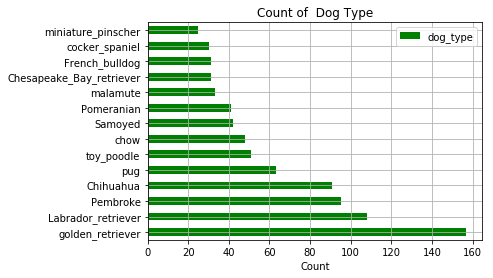

In [60]:
# Create a bar plot 

df_dog_type = pd.DataFrame(Rate_dogs_combine_copy_1['dog_type'].value_counts())
df_dog_type = df_dog_type[df_dog_type['dog_type']>=25].sort_values(by='dog_type', ascending=False)

df_dog_type.plot(kind = 'barh',color = "green")
# Set title x-axis label
plt.title('Count of  Dog Type')
plt.xlabel('Count')

# Set grid
plt.grid()


plt.savefig('Dog Type.png')

golden_retriever is the most commom bread in this dataset.

<a id=two></a> 
### Insight two: Retweets and Favorites with Time

In [61]:
Rate_dogs_combine_copy_2 = Rate_dogs_combine_copy[['date','retweet_count', 'favorite_count']]
Rate_dogs_combine_copy_2 = Rate_dogs_combine_copy_2.set_index('date')
Rate_dogs_combine_copy_2.head()

,retweet_count,favorite_count
date,,
2017-08-01,8188.0,37547.0
2017-08-01,6058.0,32274.0
2017-07-31,4008.0,24314.0
2017-07-30,8343.0,40885.0
2017-07-29,9037.0,39085.0


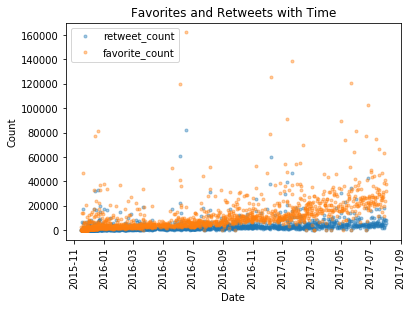

In [62]:
# Create a scatter plot 
Rate_dogs_combine_copy_2.plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.savefig('Favorites and Retweets.png')

In [79]:
Rate_dogs_combine_copy_2.describe()

,retweet_count,favorite_count
count,2001.000000,2001.000000
mean,2584.443778,8524.062969
std,4645.593911,12599.738516
min,11.000000,0.000000
25%,570.000000,1783.000000
50%,1241.000000,3823.000000
75%,2922.000000,10618.000000
max,82461.000000,162145.000000


<a id=three></a>
### Insight three & visualization: Rating and Retweet

In [75]:
Rate_dogs_combine_copy_3 = Rate_dogs_combine_copy[['retweet_count','rating_numerator','rating_denominator']]  
# Drop rows including null value
Rate_dogs_combine_copy_3 = Rate_dogs_combine_copy_3.dropna(how='any')
Rate_dogs_combine_copy_3['rating']=Rate_dogs_combine_copy_3['rating_numerator']/Rate_dogs_combine_copy_3['rating_denominator']

In [77]:
# the tweeter with the highest rating get 2604 retweeter
Rate_dogs_combine_copy_3[Rate_dogs_combine_copy_3['rating']==177.6]

,retweet_count,rating_numerator,rating_denominator,rating
975,2604.0,1776,10,177.6


In [67]:
# Exclude the highest rating tweeter
Rate_dogs_combine_copy_4= Rate_dogs_combine_copy_3[Rate_dogs_combine_copy_3['rating']!=177.6]

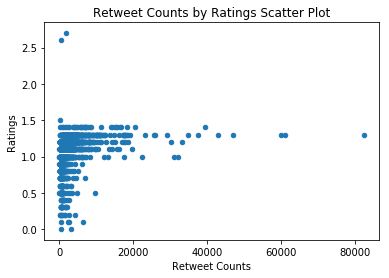

In [69]:
# Generate scatter plot
Rate_dogs_combine_copy_4.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
plt.savefig("Rating and Retweet.png")